In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [5]:
df = pd.read_csv('dropped_shi.csv')
df

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,review_theme,subtheme,review_text,solution_flg,gender_cd,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,csat_score,review_day,review_time,review_month,finish_day,finish_time,finish_month
0,2025-02-18 15:41:00,2025-02-18 16:56:49.353,fb30834209a9c7f60612c64b82c75ffa,Банк,1,0,banki.ru,кредитные карты,кредитная карта,Не определено,тарифы и условия,консультация по продукту,"Непрозрачные условия, скрытые комсисии. Почему...",проблема решена,M,NaN,0.0,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,NaN,2025-02-18,15:41:00,2,2025-02-18,16:56:49.353000,2.0
1,2025-03-24 20:06:00,2025-03-28 17:42:39.772,6601bfab426e4f56cc1e44d859683763,Страховая,1,0,banki.ru,страховая,каско,Не определено,страховое событие,жалоба по страховому случаю,"Обратился по каско , влетел камень в лобовое с...",проблема решена,M,NaN,NaN,0.0,РФ,NaN,0.0,0.0,0.0,NaN,NaN,2025-03-24,20:06:00,3,2025-03-28,17:42:39.772000,3.0
2,2025-07-08 07:40:43,2025-07-08 10:29:04.740,f1f8eff66eaf2289f61deec744871d6b,Банк,5,1,banki.ru,депозитные продукты,дебетовая карта,Не определено,мп/лк/терминал,установка/обновление приложения,Я уже очень давно пользуюсь услугами Тбанка и ...,не указано,M,0.0,1.0,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,NaN,2025-07-08,07:40:43,7,2025-07-08,10:29:04.740000,7.0
3,2025-08-07 22:51:48,2025-08-08 09:35:34.593,5ca669878eaf593f68c10e163246357b,SME,5,1,banki.ru,sme,расчетный счет,Не определено,дополнительные услуги,консультация по услуге,"Уважаемое руководство Т- Банка,\n\n\nНастоящим...",не указано,F,0.0,1.0,0.0,РФ,Высокодоходные без ПМ,0.0,0.0,1.0,Взрослые,NaN,2025-08-07,22:51:48,8,2025-08-08,09:35:34.593000,8.0
4,2025-02-13 21:38:40,2025-02-14 08:04:44.643,7a436100b113ce78c8a7a02974521a16,Банк,5,1,banki.ru,депозитные продукты,дебетовая карта,Не определено,кэшбек,корректировка кэшбека,Выбрал на текущий месяц повышенный кэшбек на к...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,NaN,2025-02-13,21:38:40,2,2025-02-14,08:04:44.643000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56815,2025-05-23 18:29:43.000,2025-05-23 19:25:21.222,19a90f722e0088dbd5c1140326475d4c,Страховая,5,1,banki.ru,страховая,взр,Не определено,страховое событие,консультации по существующему страховому событию,Отдыхали в новый год в Тель-Авиве с ребёнком. ...,не указано,M,NaN,2.0,0.0,РФ,NaN,0.0,0.0,0.0,NaN,NaN,2025-05-23,18:29:43,5,2025-05-23,19:25:21.222000,5.0
56816,2025-09-26 10:16:00.000,2025-09-26 13:27:02.360,3e5ccb5ffa7055f82085ccd18b7190c4,Банк,5,1,sravni.ru,поддержка сотрудников,не определено,Не определено,тарифы и условия,консультация по продукту,Здравствуйте я очень довольна работой группы п...,не указано,F,0.0,4.0,0.0,РФ,Доходные,0.0,0.0,0.0,Сеньоры,NaN,2025-09-26,10:16:00,9,2025-09-26,13:27:02.360000,9.0
56817,2025-10-23 18:41:00.000,2025-10-23 19:20:28.205,ff8dee14ae0b2c22593ab20ffb9d8e26,Банк,5,1,sravni.ru,депозитные продукты,дебетовая карта,Не определено,мп/лк/терминал,консультация по интерфейсу,Банк и прилодение\nПо моему мнению лучший банк...,не указано,M,NaN,1.0,0.0,РФ,Доходные,0.0,0.0,0.0,Взрослые,NaN,2025-10-23,18:41:00,10,2025-10-23,19:20:28.205000,10.0
56818,2025-09-02 13:12:13.000,2025-09-02 13:35:01.523,b8deb649421f64fc4a5b6c71b350f528,Банк,5,1,banki.ru,премиальные сервисы,premium,Не определено,"платежи, переводы и операции",отмена / оспаривание,Огромная благодарность сотруднику Т-Банка (Лео...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Взрослые,NaN,2025-09-02,13:12:13,9,2025-09-02,13:35:01.523000,9.0


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

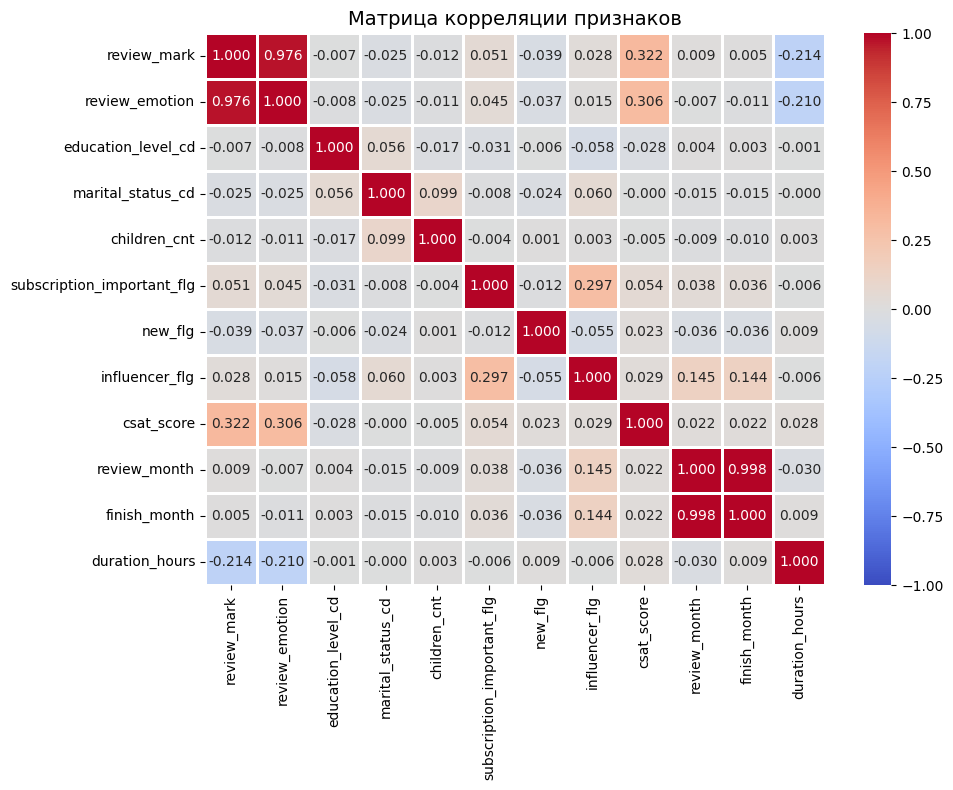

In [7]:
df['review_dttm'] = pd.to_datetime(df['review_dttm'], format='mixed')
df['finish_dttm'] = pd.to_datetime(df['finish_dttm'], format='mixed')

df['duration_hours'] = (df['finish_dttm'] - df['review_dttm']).dt.total_seconds() / 3600

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,  linewidths=1, fmt='.3f')

plt.title('Матрица корреляции признаков', fontsize=14)
plt.tight_layout()
plt.show()


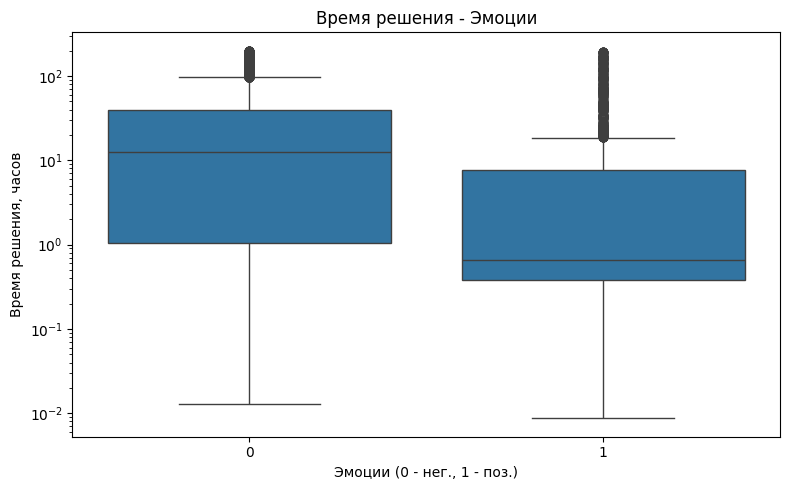

In [8]:
df_filtered = df[df['duration_hours'] < 200]

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x='review_emotion', y='duration_hours')
plt.title('Время решения - Эмоции')
plt.xlabel('Эмоции (0 - нег., 1 - поз.)')
plt.ylabel('Время решения, часов')
plt.yscale('log')
plt.tight_layout()
plt.show()


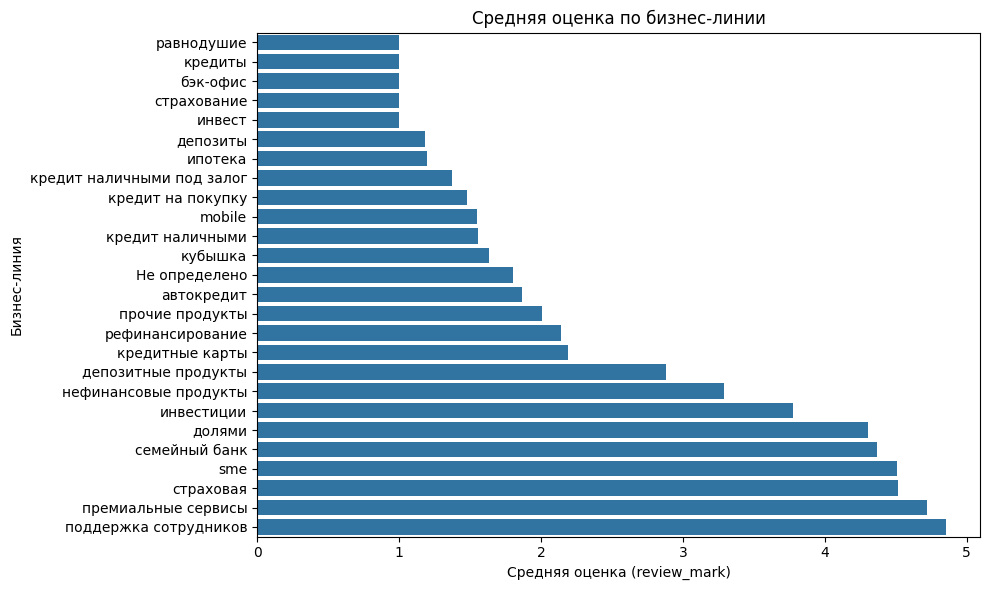

In [14]:
plt.figure(figsize=(10, 6))
business_stats = (df.groupby('business_line')['review_mark'].mean().reset_index())

business_stats = business_stats.sort_values('review_mark')

sns.barplot(data=business_stats, x='review_mark', y='business_line')
plt.title('Средняя оценка по бизнес-линии')
plt.xlabel('Средняя оценка (review_mark)')
plt.ylabel('Бизнес-линия')
plt.tight_layout()
plt.show()

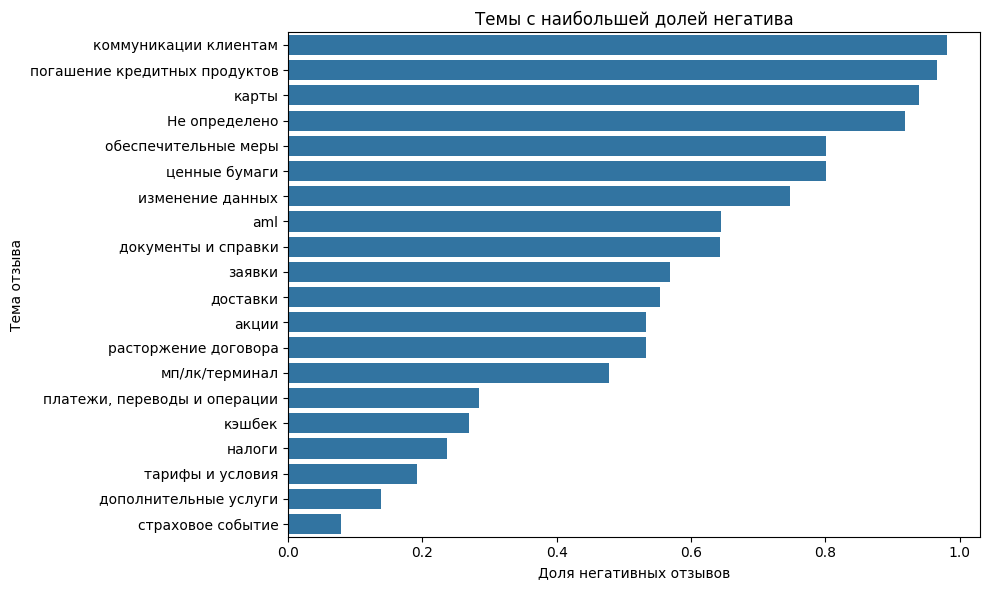

In [10]:
theme_stats = (df
    .groupby('review_theme')['review_emotion']
    .agg(share_positive='mean', count='size')
    .reset_index())
theme_stats['share_negative'] = 1 - theme_stats['share_positive']

theme_stats = theme_stats[theme_stats['count'] > 250]

theme_stats = theme_stats.sort_values('share_negative', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(data=theme_stats, x='share_negative', y='review_theme')
plt.title('Темы с наибольшей долей негатива')
plt.xlabel('Доля негативных отзывов')
plt.ylabel('Тема отзыва')
plt.tight_layout()
plt.show()

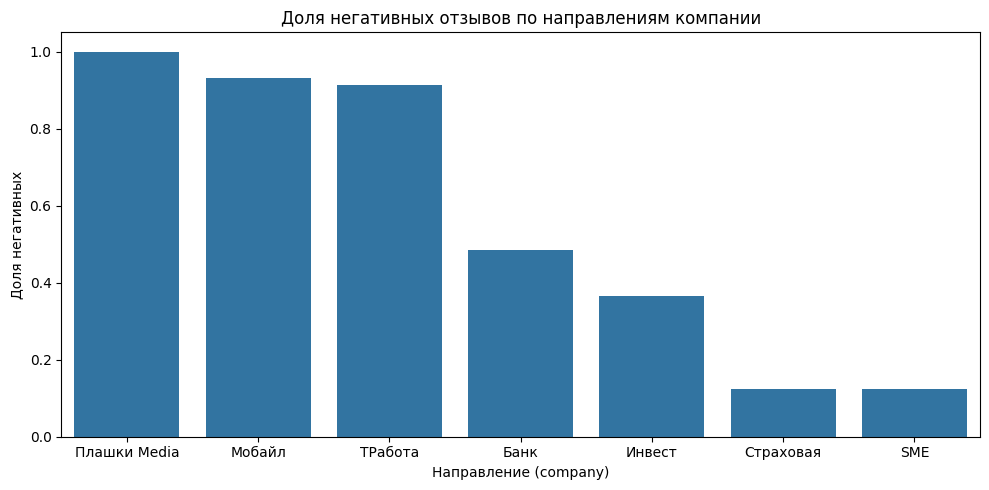

In [11]:
company_stats = (df
    .groupby('company')['review_emotion']
    .agg(share_positive='mean', count='size')
    .reset_index())
company_stats['share_negative'] = 1 - company_stats['share_positive']

plt.figure(figsize=(10, 5))
sns.barplot(data=company_stats.sort_values('share_negative', ascending=False), x='company', y='share_negative')
plt.title('Доля негативных отзывов по направлениям компании')
plt.xlabel('Направление (company)')
plt.ylabel('Доля негативных')
plt.tight_layout()
plt.show()